<a href="https://colab.research.google.com/github/RIZKYANGKATA/MACHLEARN/blob/main/KUIS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install torch torchvision numpy matplotlib pandas

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Download the MNIST dataset using torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 107616535.12it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31987244.21it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29461293.73it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15718258.06it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Ekstrak data dan labelnya
data = mnist_dataset.data
labels = mnist_dataset.targets

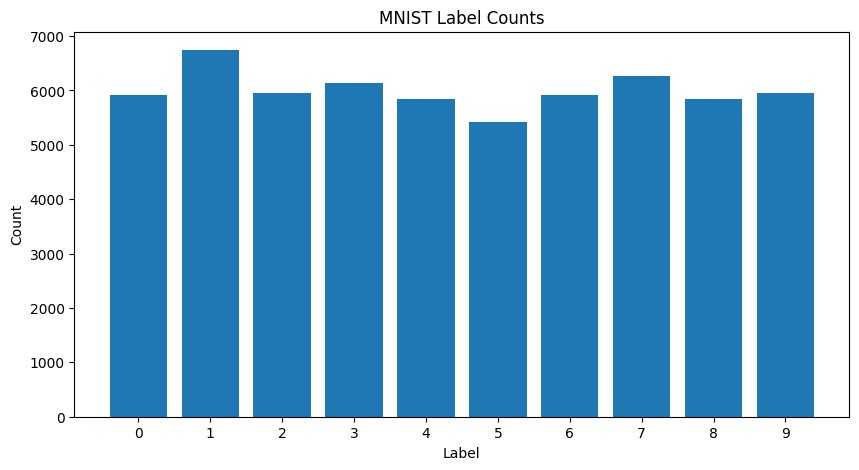

In [5]:
# 1. Hitung ukuran setiap label
label_counts = torch.bincount(labels)

# Membuat diagram batang untuk memvisualisasikan jumlah label
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('MNIST Label Counts')
plt.show()

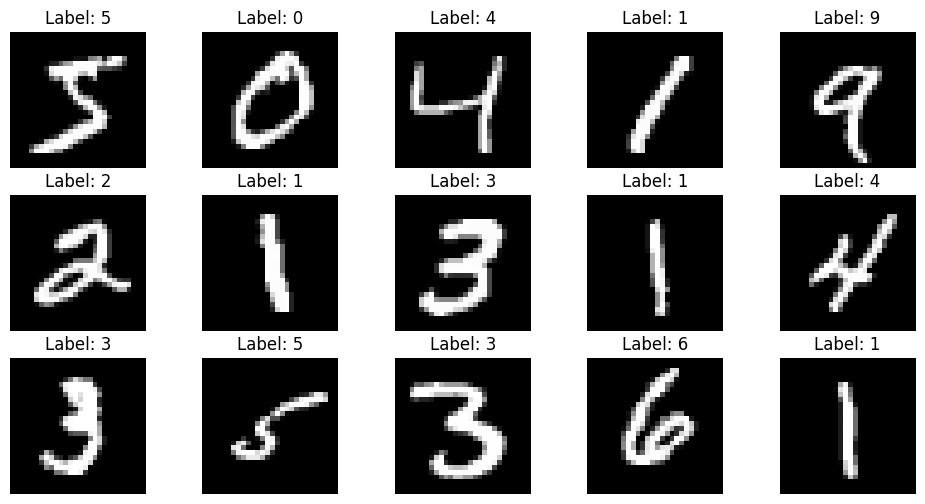

In [6]:
# 2. Tampilkan 15 gambar pertama beserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.show()

In [9]:
import numpy as np
import tensorflow as tf

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Mengonversi setiap citra menjadi vektor 1D
num_samples, img_height, img_width = train_images.shape
train_images_flat = train_images.reshape((num_samples, img_height * img_width))

# Menampilkan ukuran hasil ekstraksi fitur
print("Ukuran ekstraksi fitur menggunakan nilai asli piksel citra:", train_images_flat.shape)

11490434/11490434 [==============================] - 0s 0us/step
Ukuran ekstraksi fitur menggunakan nilai asli piksel citra: (60000, 784)


In [10]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen PCA yang diinginkan
num_pca_components = 50  # Anda dapat menyesuaikan jumlah komponen ini sesuai kebutuhan

# Menerapkan PCA pada data gambar MNIST
pca = PCA(n_components=num_pca_components)
train_images_pca = pca.fit_transform(train_images_flat)

# Menampilkan ukuran hasil ekstraksi fitur
print("Ukuran ekstraksi fitur menggunakan PCA:", train_images_pca.shape)

Ukuran ekstraksi fitur menggunakan PCA: (60000, 50)


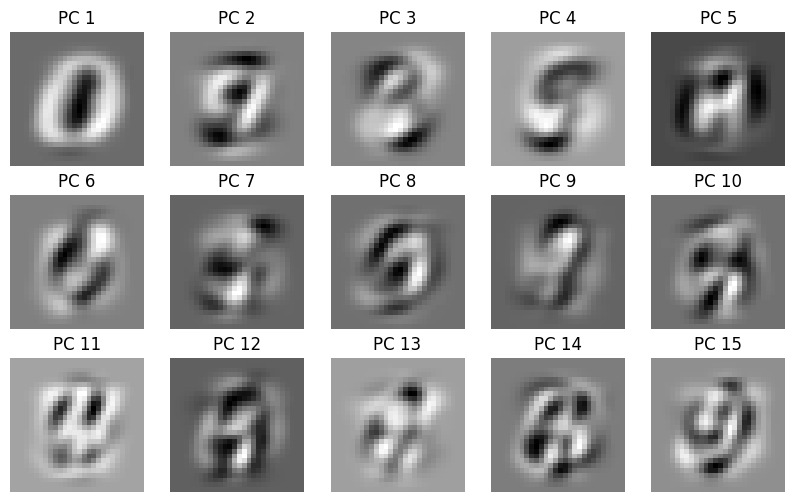

In [26]:
# Visualize the first 15 principal components (eigendigits)
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i in range(15):
    axi = ax[i // 5, i % 5]
    eigendigit = pca.components_[i].reshape(28, 28)
    axi.imshow(eigendigit, cmap='gray')
    axi.set_title(f'PC {i + 1}')
    axi.axis('off')

plt.show()

In [12]:
# 4. Pisahkan data untuk pengujian dan pelatihan

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.3)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    data_pca, labels, test_size=0.2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    data_pca, labels, test_size=0.1)

# Verifikasi bentuk set pelatihan dan pengujian
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])


In [13]:
# 5, 6, 7 sesuai dengan data Anda (menggunakan kernel linier)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_model = SVC(kernel='linear')

# Sesuaikan model SVM dengan data pelatihan
linear_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = linear_model.predict(X_test)

In [14]:
# Evaluasi modelnya
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 92.91%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1751
           1       0.96      0.97      0.97      2024
           2       0.91      0.93      0.92      1806
           3       0.90      0.90      0.90      1794
           4       0.93      0.95      0.94      1755
           5       0.90      0.89      0.90      1662
           6       0.97      0.96      0.96      1805
           7       0.94      0.93      0.94      1860
           8       0.91      0.88      0.89      1759
           9       0.92      0.91      0.91      1784

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000

Confusion Matrix:
 [[1708    0    8    2    2    9   10    2    9    1]
 [   0 1972   11    3    5    3    2    5   20    3]
 [  16   17 1671   19   21    9   12   11   26    4]
 [  12   15   41 1609 

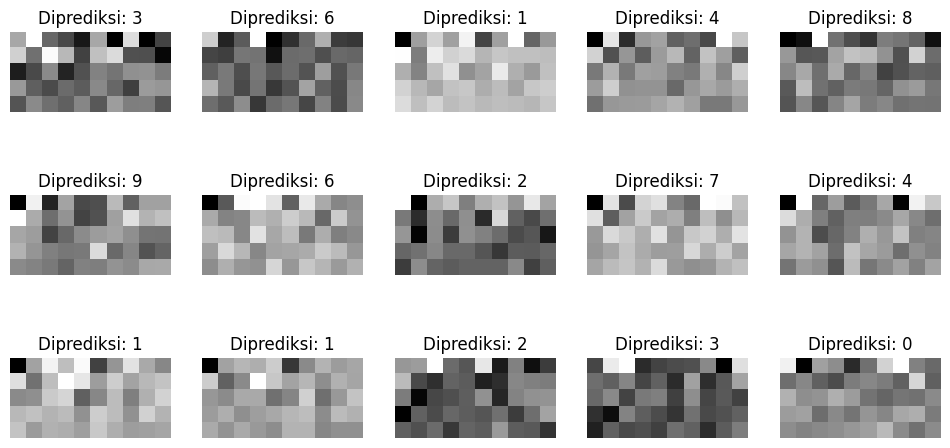

In [27]:
# Visualisasikan beberapa contoh prediksi
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Diprediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [16]:
# 5, 6, 7 sesuai dengan data Anda (menggunakan kernel rbf)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_model = SVC(kernel='rbf')

# Sesuaikan model SVM dengan data pelatihan
rbf_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = rbf_model.predict(X_test)

In [17]:
# Evaluasi modelnya
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 96.85%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1751
           1       0.98      0.98      0.98      2024
           2       0.96      0.97      0.97      1806
           3       0.97      0.94      0.95      1794
           4       0.96      0.97      0.96      1755
           5       0.97      0.97      0.97      1662
           6       0.98      0.98      0.98      1805
           7       0.96      0.97      0.96      1860
           8       0.97      0.96      0.96      1759
           9       0.95      0.95      0.95      1784

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000

Confusion Matrix:
 [[1733    1    1    1    1    1    7    1    5    0]
 [   0 1991    9    1    6    0    3    6    3    5]
 [   7    6 1756   10    5    2    5   11    2    2]
 [   2    9   18 1692 

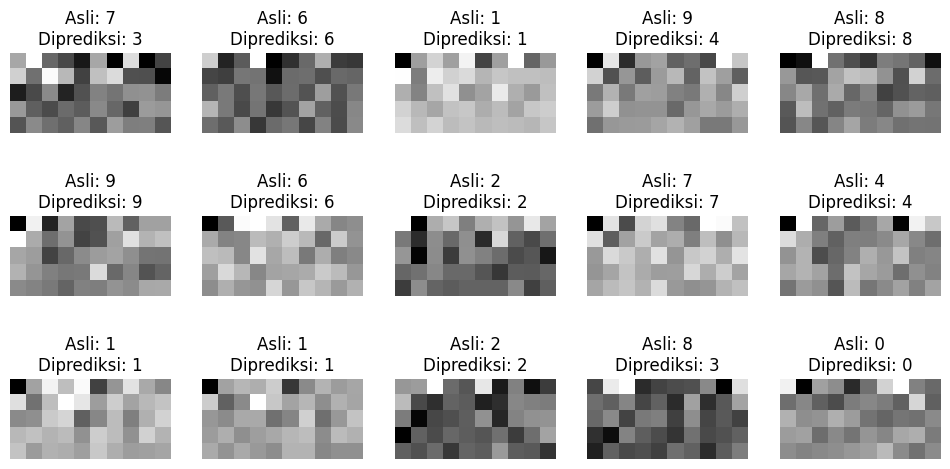

In [28]:
# Visualisasikan beberapa contoh prediksi
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Asli: {y_test[i]}\nDiprediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [19]:
# 5, 6, 7 sesuai dengan data Anda (menggunakan kernel polinomial)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

poly_model = SVC(kernel='poly', degree=3)

# Sesuaikan model SVM dengan data pelatihan
poly_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = poly_model.predict(X_test)

In [20]:
# Evaluasi modelnya
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 96.42%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1751
           1       0.98      0.98      0.98      2024
           2       0.97      0.96      0.97      1806
           3       0.96      0.94      0.95      1794
           4       0.95      0.97      0.96      1755
           5       0.97      0.97      0.97      1662
           6       0.99      0.98      0.98      1805
           7       0.98      0.95      0.96      1860
           8       0.92      0.97      0.94      1759
           9       0.94      0.95      0.94      1784

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000

Confusion Matrix:
 [[1713    1    2    1    4    8    4    0   17    1]
 [   0 1983    8    4    7    0    3    3   11    5]
 [   8    5 1739    9    8    1    3    7   24    2]
 [   3    6   18 1682 

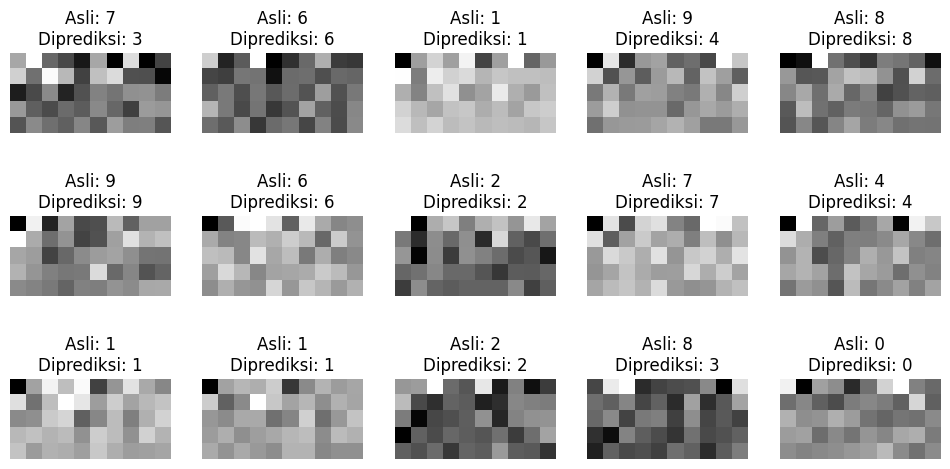

In [29]:
# Visualisasikan beberapa contoh prediksi

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Asli: {y_test[i]}\nDiprediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [30]:
# 5, 6, 7 sesuai dengan data Anda (menggunakan kernel sigmoid)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sigmoid_model = SVC(kernel='sigmoid', degree=3)

# Sesuaikan model SVM dengan data pelatihan
sigmoid_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = sigmoid_model.predict(X_test)

In [23]:
# Evaluasi modelnya
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 78.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79      1751
           1       0.88      0.94      0.91      2024
           2       0.76      0.74      0.75      1806
           3       0.78      0.78      0.78      1794
           4       0.84      0.80      0.82      1755
           5       0.72      0.69      0.70      1662
           6       0.85      0.81      0.83      1805
           7       0.77      0.81      0.79      1860
           8       0.83      0.70      0.76      1759
           9       0.73      0.73      0.73      1784

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000

Confusion Matrix:
 [[1503    0   37   13    4  130   22   11   25    6]
 [   0 1909   18   30    4   12    3   16   27    5]
 [  76   60 1339   57   26   16  129   36   42   25]
 [  43   25   73 1401 

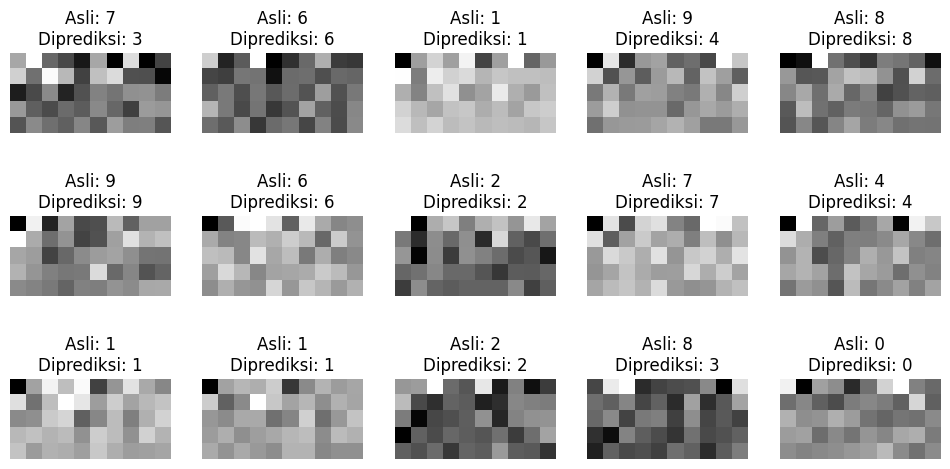

In [25]:
# Visualisasikan beberapa contoh prediksi
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Asli: {y_test[i]}\nDiprediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()